<a href="https://colab.research.google.com/github/Janani-harshu/Machine_Learning_Projects/blob/main/Insta_Reach_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instagram is one of the most popular social media applications today. People using Instagram professionally are using it for promoting their business, building a portfolio, blogging, and creating various kinds of content. As Instagram is a popular application used by millions of people with different niches, Instagram keeps changing to make itself better for the content creators and the users. But as this keeps changing, it affects the reach of our posts that affects us in the long run. So if a content creator wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in. 

In this notebook, I will take you through Instagram Reach Analysis using Python, which will help content creators to understand how to adapt to the changes in Instagram in the long run.

## Insta Reach Analysis
I have been researching Instagram reach for a long time now. Every time I post on my Instagram account, I collect data on how well the post reach after a week. That helps in understanding how Instagram’s algorithm is working. If you want to analyze the reach of your Instagram account, you have to collect your data manually as there are some APIs, but they don’t work well. So it’s better to collect your Instagram data manually.


In [1]:
# Importing the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
data = pd.read_csv("/content/Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# Checking for null values in the dataset 
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [4]:
# Drop all the null value columns 
data = data.dropna()

In [5]:
data.info

<bound method DataFrame.info of     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0        3920.0     2586.0         1028.0         619.0        56.0   98.0   
1        5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2        4021.0     2085.0         1188.0           0.0       533.0   41.0   
3        4528.0     2700.0          621.0         932.0        73.0  172.0   
4        2518.0     1704.0          255.0         279.0        37.0   96.0   
..          ...        ...            ...           ...         ...    ...   
94       4082.0     2195.0         1248.0         541.0        36.0  135.0   
95       5394.0     2275.0         2975.0          45.0        65.0   61.0   
96       2766.0     2541.0          116.0          51.0         9.0   40.0   
97       3924.0     2244.0         1278.0         326.0        34.0  139.0   
98       3015.0     2034.0          771.0         115.0        41.0   52.0   

    Comments  Shares  Likes  Pr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


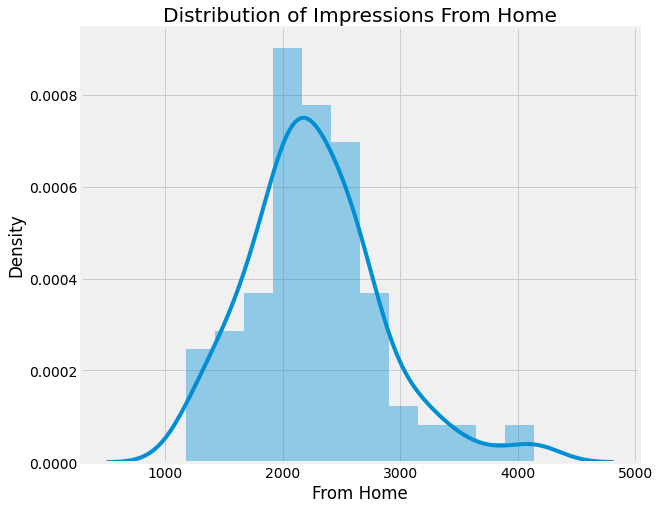

In [6]:
# Distribution of impresssions from home 
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


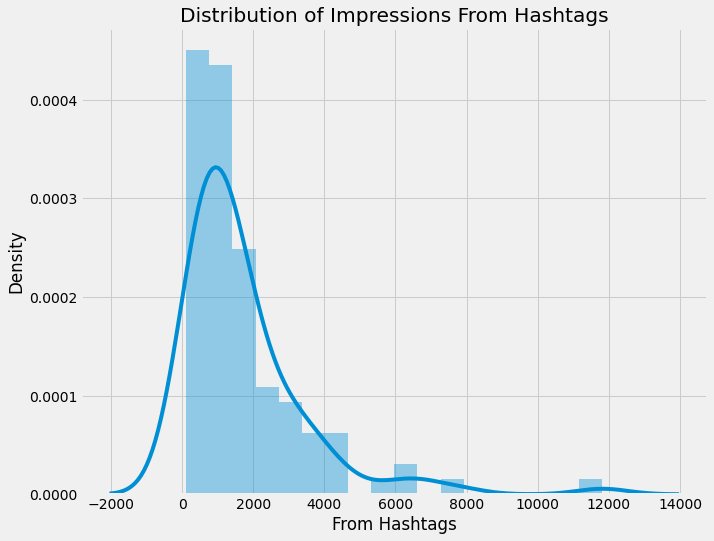

In [7]:
# Distribution of Impressions From Hashtags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


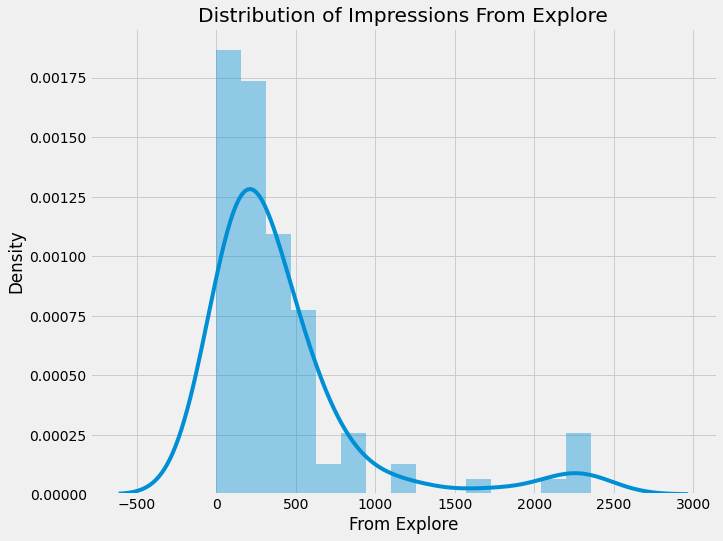

In [8]:
# Distribution of Impressions From Explore
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

In [9]:
# Percentage of impressions I get from various sources on Instagram
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

So the above donut plot shows that almost 50 per cent of the reach is from my followers, 38.1 per cent is from hashtags, 9.14 per cent is from the explore section, and 3.01 per cent is from other sources.

## Analyzing Content
Now let’s analyze the content of my Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content I post on Instagram.

Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

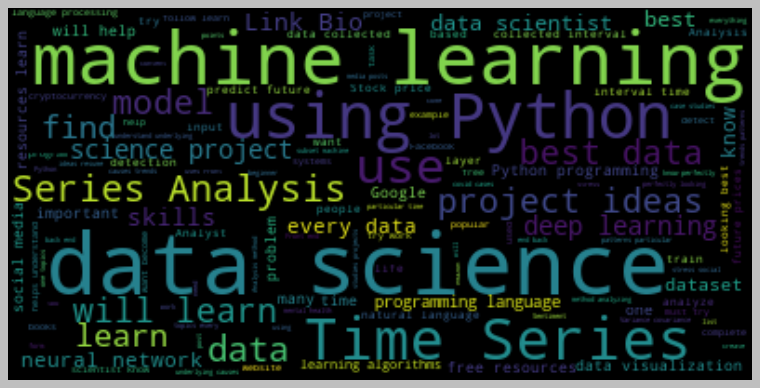

In [10]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

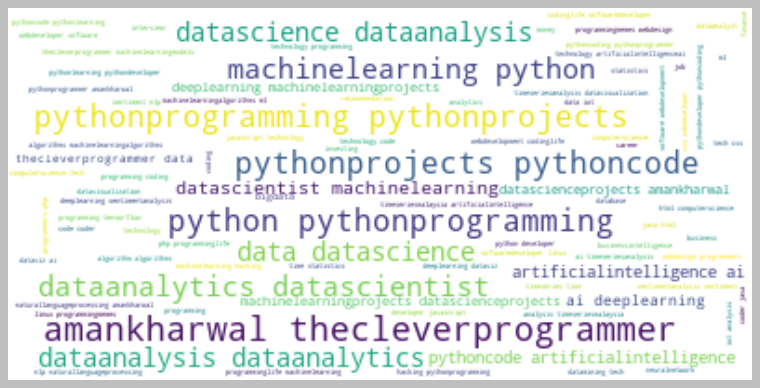

In [11]:
# wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing Relationships
Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

In [12]:
# relationship between the number of likes and the number of impressions on my Instagram posts
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



There is a linear relationship between the number of likes and the reach I got on Instagram

In [13]:
# relationship between the number of comments and the number of impressions on my Instagram posts
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

It looks like the number of comments we get on a post doesn’t affect its reach

In [14]:
# relationship between the number of shares and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. 

In [15]:
# relationship between the number of saves and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

In [16]:
# correlation of all the columns with the Impressions column
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


## Analyzing Conversion Rate
In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. 

Now let’s have a look at the conversation rate of my Instagram account:

In [17]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate. 

In [18]:
# relationship between the total profile visits and the number of followers gained from all profile visits
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

## Instagram Reach Prediction Model
Now in this section, I will train a machine learning model to predict the reach of an Instagram post.

In [19]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

# Split the data into training and test sets before training the model
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [73]:
# Passive Agressive Regressor 
passive = PassiveAggressiveRegressor()
passive.fit(xtrain, ytrain)
passive.score(xtest, ytest)

0.9372487889761428

In [66]:
# Linear Regressor 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.8016846856454838

In [67]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 998.9)
lasso.fit(xtrain, ytrain)
lasso.score(xtest, ytest)

0.8615207728809463

In [68]:
# XGBoost 
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(xtrain, ytrain)
xg.score(xtest, ytest)

[07:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7611957702591137

In [69]:
# Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)


0.7302304207854732

let’s predict the reach of an Instagram post by giving inputs to the machine learning model (Passive Agressive Regressor has good score of 0.937):

In [70]:
# Features = [['Impressions','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
passive.predict(features)

array([10601.9024171])